# Nuages de mots

## Imports et stopwords

In [1]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\balda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem",
    "soir", "journal", "quotidien", "édition", "numéro",
    "article", "pages", "page", "rubrique",
    "déclare", "déclaré", "déclaration",
    "selon", "notamment", "ainsi",
    "encore", "toujours", "déjà",
    "avant", "après", "pendant" "rue", "place", "avenue", "centre",
    "ville", "quartier",
    "gare", "maison", "salle","jour", "jours", "heure", "heures",
    "matin", "soirée", "nuit",
    "lundi", "mardi", "mercredi", "jeudi", "vendredi", "samedi", "dimanche",
    "mois", "année", "années", "ans",
    "juillet", "août"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [3]:
# Choisir une année
year = 1960

In [4]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
len(txts)

539

In [5]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [6]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

539

In [7]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][0:200]

"74* ANNEE — N* 157 • JOURNAL OUOTtDlîN 24 Pages - 2 fr. Congo « h. franc» t H. T. 0 (r 30 — Sulu» t 0 tr. 40 9uUl9» CHEQUES POSTAUX PUBltCITE t CompU n* 5674 ROSSEL 4 C'» VENTE i Soir «t Soir Illustré"

In [8]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [9]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

"74* ANNEE — N* 157 • JOURNAL OUOTtDlîN 24 Pages - 2 fr. Congo « h. franc» t H. T. 0 (r 30 — Sulu» t 0 tr. 40 9uUl9» CHEQUES POSTAUX PUBltCITE t CompU n* 5674 ROSSEL 4 C'» VENTE i Soir «t Soir Illustré t I46B6 Rotxl i C 1 * DONS aux CEuvr#» du Soir {,14232 Rouol 6 C'* Les manuscrits non Inséré* ne sont pas rendus ACENCC ROS6EL . Annonces et Publicité LE SOIR - Vente et Abonnements : BRUXELLES I : 112, rue Royale. 112 PARIS IS'Is 73, r. d'Anjou, T. EURopa 36.16 PLACE DE LOUVAIN. 21 - BRUXELLES I ."

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [10]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [11]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1960_clean.txt!'

In [12]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'ANNEE OUOTTDLÎN CONGO FRANC SULU CHEQUES POSTAUX PUBLTCITE COMPU VENTE ILLUSTRÉ ROTXL DONS CEUVR ROUOL MANUSCRITS INSÉRÉ RENDUS ACENCC ANNONCES PUBLICITÉ VENTE ABONNEMENTS BRUXELLES RUE ROYALE PARIS ANJOU EUROPA LOUVAIN BRUXELLES RIVU IMI REDACTION LOUVALN BRUSOLLAS PARIS RUE ANJOU LONDRES QUEE VICTOR SFR CORRESPONDANTS DAH GRARTDAS CAPITALES SMM QUELLE OUE IHEUIIE LAQUELLE DEMANDEE ATŸ VENDEUR DERNIERE EDITION PARUE JUIN JOURNÉE HISTORIQUE BELGIQUE DONNE INDÉPENDANCE TIV FAI TIMM PROCLAMATION S'

## Nuage de mots

### Afficher les termes les plus fréquents


In [13]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('TÉL', 8385), ('RUE', 6479), ('BRUXELLES', 5661), ('MME', 4883), ('PRIX', 3855), ('CONGO', 3818), ('ENF', 3241), ('APP', 3177), ('ENFANTS', 3011), ('TRÈS', 2960)]


### Créer, stocker et afficher le nuage de mots

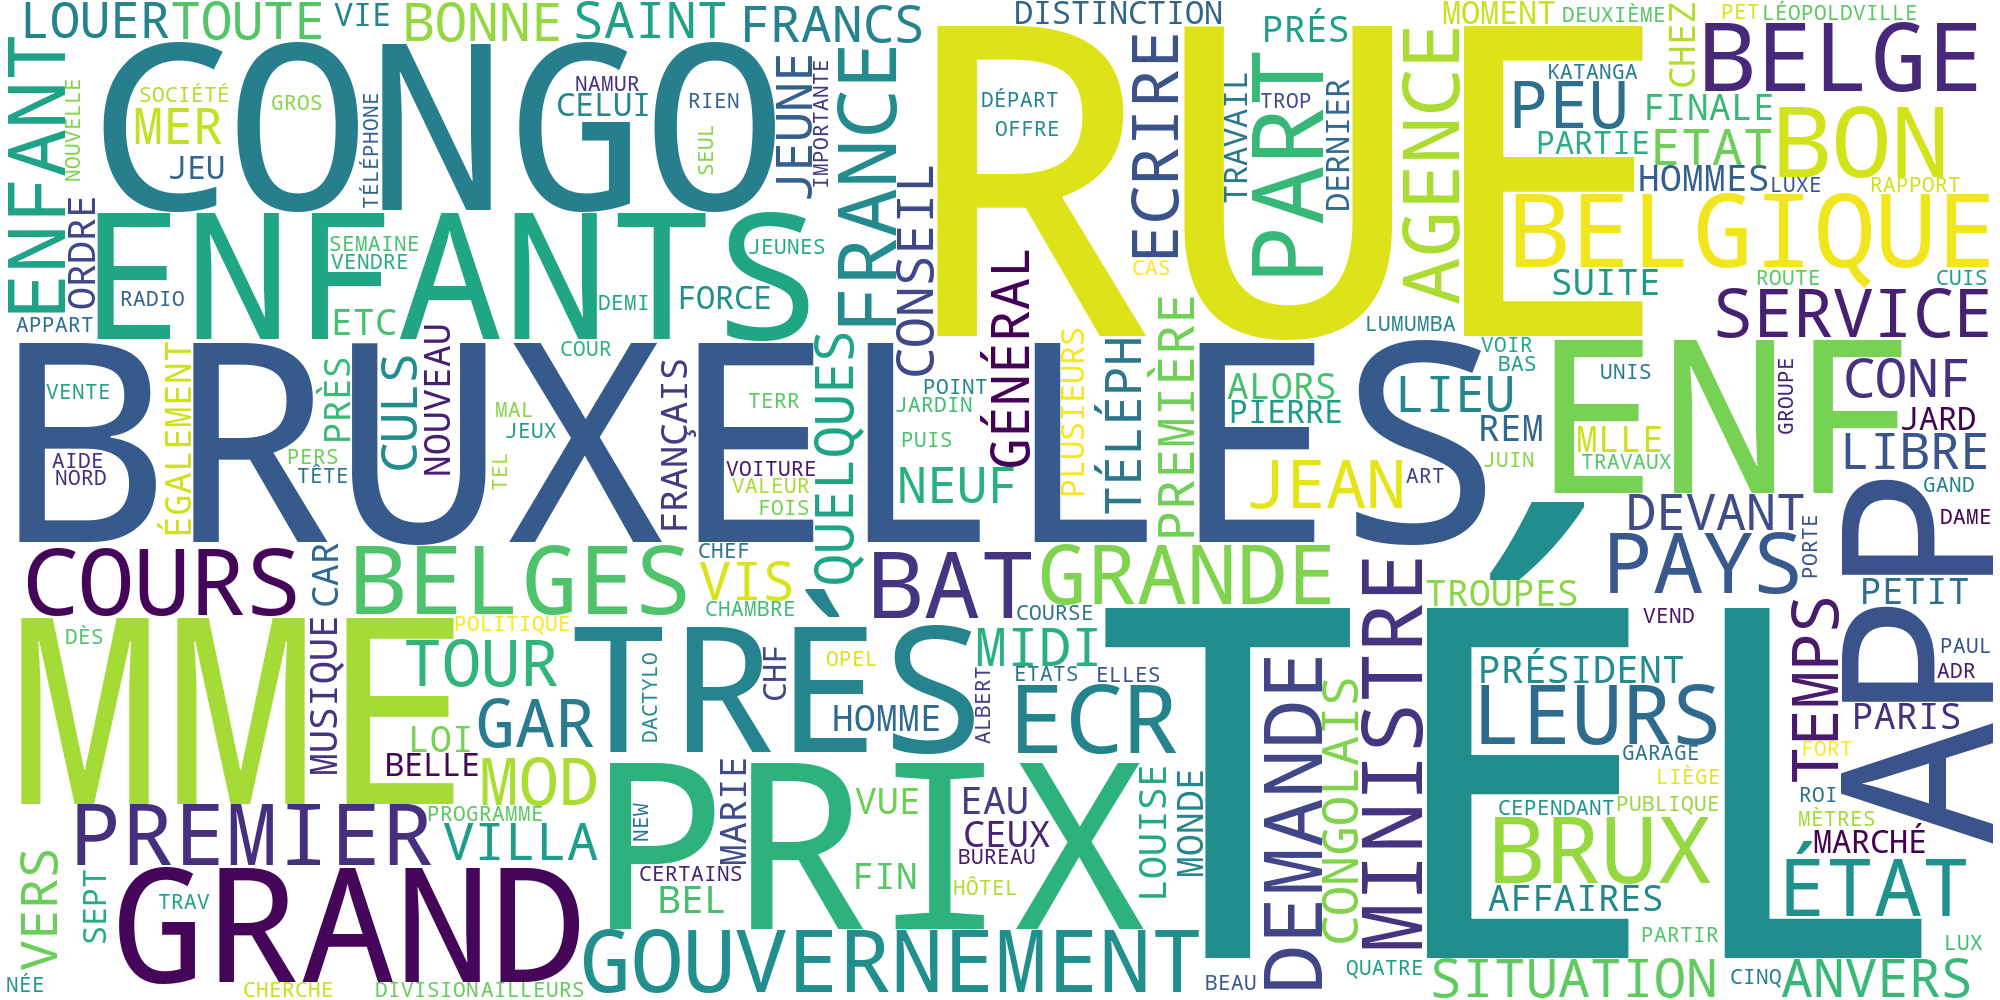

In [14]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))